## Gait Analysis On NTNU Belt Sensor

### About data

The Data is collected on 5 participants where three sensors worn on the belt.The following activities were performed:
1. Walking Downstairs for 15 seconds 
2. Walking straight for 15 seconds 
3. walking Upstairs for 15 seconds 
4. sitting for 6 seconds 
5. Laying  for 6 seconds 
6. standing  for 6 seconds

In [1]:
"""
Gait Analysis On NTNU Belt Sensor
The NTNU belt sensor dataset was collected for detecting activity of daily living (ADLs) on healthy people.
A total of 8 participants performed  activities of daily living: walking, walking downstairs, walking upstairs, sitting,
lying, and standing.Each subject wore three IMU sensors simultaneously at specific body locations around the waist,
including left, right, and middle back of waist, to record activity data at a sampling rate of 100 Hz. 

"""
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import csv

C:\Users\adanent\Anaconda3\envs\Annotation_tool\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# Read dataset
df = pd.read_csv('belt_sensor_all.csv')
print(df.shape)
df.head()

(108170, 21)


,Pid,timestamp,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,...,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,P1_BS,3.00,-84.23,-994.63,8.06,-0.37,-2.62,1.65,311.28,-1061.28,...,2.08,-3.23,-4.33,-68.12,-970.46,150.15,1.83,0.24,0.61,Downstairs
1,P1_BS,3.01,-86.43,-1004.15,16.85,-0.18,-3.17,0.85,301.76,-1024.66,...,6.77,3.05,-3.78,-73.24,-978.52,140.62,0.55,-0.24,0.31,Downstairs
2,P1_BS,3.02,-92.29,-1001.22,9.52,-0.06,-3.72,0.00,290.04,-996.09,...,10.25,8.97,-3.30,-76.17,-983.64,145.02,-0.73,-0.67,0.18,Downstairs
3,P1_BS,3.03,-92.29,-1004.88,19.04,-0.12,-4.39,-0.79,260.74,-964.60,...,11.96,14.10,-2.56,-64.45,-988.77,145.02,-0.73,-1.04,-0.37,Downstairs
4,P1_BS,3.04,-82.03,-1001.22,18.31,-0.31,-5.25,-1.53,229.25,-935.30,...,12.33,18.68,-1.71,-68.12,-982.18,146.48,-0.31,-0.98,-0.43,Downstairs


In [3]:
### Low Pass filter 
from scipy import signal
def butter_lowpass(cutoff, nyq_freq, order=4):
    normal_cutoff = float(cutoff) / nyq_freq
    b, a = signal.butter(order, normal_cutoff, btype='lowpass')
    return b, a

def butter_lowpass_filter(data, cutoff_freq, nyq_freq, order=4):
    b, a = butter_lowpass(cutoff_freq, nyq_freq, order=order)
    y = signal.filtfilt(b, a, data)
    return y

#low pass filter
lowpass_filtred=[]
dfm=df[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
for column in dfm.columns:# iterate over each column in raw_df
    cutoff_frequency = 15.0
    sample_rate=100
    t_signal=np.array(dfm[column]) #copie the signal values in 1D numpy array
    y = butter_lowpass_filter(t_signal,cutoff_frequency,sample_rate/2) 
    lowpass_filtred.append(y)
lowpass=pd.DataFrame(lowpass_filtred)
lowpass=lowpass.T
lowpass.columns=['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']
df1=df[['Pid','timestamp']]
df_filtred=pd.concat([df1,lowpass],axis=1)
df_filtred['Label']=df['Label']

In [4]:
df_filtred['Label'].value_counts()

Upstairs      29345
Downstairs    25030
Walking       19440
Standing      12180
Sitting       11265
Laying        10910
Name: Label, dtype: int64

In [5]:
from imblearn.over_sampling import SMOTE

In [6]:
# split data into input and output elements
X = df_filtred[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy',
       'S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = df_filtred[['Label']]

oversample = SMOTE()
Xo, yo = oversample.fit_resample(X, y)

df_Smoted=pd.concat([Xo,yo],axis=1)
print(df_Smoted.shape)
df_Smoted.tail(2)

(176070, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
176068,-312.960105,-1386.171659,212.337797,4.964636,15.939255,-51.793622,-157.305670,-985.732164,93.198955,-8.906410,21.844893,-27.960173,407.477827,-1420.860574,673.965730,14.417867,-58.343759,35.561282,Walking
176069,156.123528,-829.336591,349.631633,-15.810096,20.588394,-13.737688,-145.912044,-865.097703,152.767892,26.843557,-77.957404,-7.751772,-133.792459,-717.196122,274.306877,2.852505,35.155014,-8.260857,Walking


In [7]:
#Label encoding
df_Smoted['Label_id']=df_Smoted['Label']
dff=df_Smoted.replace({'Label_id': {'Downstairs':0,'Walking':1,'Upstairs':2,
                        'Sitting':3,'Laying':4,'Standing':5}})
print(dff.shape)
dff.head(2)

(176070, 20)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label,Label_id
0,-84.222490,-994.627346,8.055153,-0.370396,-2.620791,1.649596,311.291489,-1061.332673,81.294603,2.077435,-3.234044,-4.329407,-68.121248,-970.461276,150.138268,1.829730,0.240081,0.610366,Downstairs,0
1,-88.069874,-998.773910,11.651440,-0.282880,-3.161370,0.810362,301.127326,-1027.592784,86.576920,6.452058,2.962058,-3.769370,-70.387323,-977.643665,146.687971,0.477777,-0.317638,0.282808,Downstairs,0


In [8]:
### Normalize/Standardize data
from sklearn.preprocessing import StandardScaler, LabelEncoder
X = dff[['S1_Ax', 'S1_Ay', 'S1_Az', 'S1_Gx', 'S1_Gy','S1_Gz', 'S2_Ax', 'S2_Ay', 'S2_Az', 'S2_Gx', 'S2_Gy', 'S2_Gz', 'S3_Ax',
       'S3_Ay', 'S3_Az', 'S3_Gx', 'S3_Gy', 'S3_Gz']]
y = dff['Label']
scaler = StandardScaler()
dx = scaler.fit_transform(X)

df_scaled = pd.DataFrame(data = dx, columns = X.columns)
df_scaled['Label'] = y.values

print(df_scaled.shape)
df_scaled.head()

(176070, 19)


,S1_Ax,S1_Ay,S1_Az,S1_Gx,S1_Gy,S1_Gz,S2_Ax,S2_Ay,S2_Az,S2_Gx,S2_Gy,S2_Gz,S3_Ax,S3_Ay,S3_Az,S3_Gx,S3_Gy,S3_Gz,Label
0,-0.349060,-0.332890,-0.826558,-0.028677,-0.171947,0.112127,0.836087,-0.568252,-0.610177,0.100795,-0.186714,-0.205446,-0.342784,-0.270347,0.343685,0.092719,-0.066390,0.056566,Downstairs
1,-0.359779,-0.345851,-0.807355,-0.024601,-0.189051,0.070823,0.806677,-0.459531,-0.586490,0.277288,0.000644,-0.177072,-0.355128,-0.294201,0.335359,0.043716,-0.085242,0.039161,Downstairs
2,-0.364123,-0.356294,-0.791112,-0.021353,-0.208552,0.030333,0.763143,-0.352157,-0.554399,0.419234,0.178036,-0.145810,-0.359611,-0.312207,0.330157,0.010824,-0.099028,0.023102,Downstairs
3,-0.359753,-0.363579,-0.780185,-0.018337,-0.230996,-0.007992,0.696964,-0.250111,-0.507603,0.503090,0.337695,-0.111277,-0.353639,-0.321533,0.328960,0.002303,-0.104825,0.010829,Downstairs
4,-0.349630,-0.368947,-0.775906,-0.013975,-0.254327,-0.042153,0.608359,-0.160682,-0.444461,0.522068,0.474803,-0.076006,-0.340469,-0.323245,0.330214,0.015084,-0.103284,0.005382,Downstairs


In [9]:
## Segmentation (window Preparation)
import scipy.stats as stats
Fs = 100
segment_size = 500 # fs*3 # window size=n_time steps=frame size
step_size = 50  #  Fs/2 # step size is related to window overlap
n_features = 18

def get_segments(df, segment_size, step_size):

    segments = []
    labels = []
    
    for i in range(0, len(df) - segment_size - 1, step_size):
        S1Ax = df_scaled['S1_Ax'].values[i: i + segment_size]
        S1Ay = df_scaled['S1_Ay'].values[i: i + segment_size]
        S1Az = df_scaled['S1_Az'].values[i: i + segment_size]
        S1Gx = df_scaled['S1_Gx'].values[i: i + segment_size]
        S1Gy = df_scaled['S1_Gy'].values[i: i + segment_size]
        S1Gz = df_scaled['S1_Gz'].values[i: i + segment_size]
        
        S2Ax = df_scaled['S2_Ax'].values[i: i + segment_size]
        S2Ay = df_scaled['S2_Ay'].values[i: i + segment_size]
        S2Az = df_scaled['S2_Az'].values[i: i + segment_size]
        S2Gx = df_scaled['S2_Gx'].values[i: i + segment_size]
        S2Gy = df_scaled['S2_Gy'].values[i: i + segment_size]
        S2Gz = df_scaled['S2_Gz'].values[i: i + segment_size]
        
        
        S3Ax = df_scaled['S3_Ax'].values[i: i + segment_size]
        S3Ay = df_scaled['S3_Ay'].values[i: i + segment_size]
        S3Az = df_scaled['S3_Az'].values[i: i + segment_size]
        S3Gx = df_scaled['S3_Gx'].values[i: i + segment_size]
        S3Gy = df_scaled['S3_Gy'].values[i: i + segment_size]
        S3Gz = df_scaled['S3_Gz'].values[i: i + segment_size]
        
          # Retrieve the most often used label in this segment
        label = stats.mode(df_scaled['Label'][i: i + segment_size])[0][0] ## [0][0] shows the current sequence
        
        #We used the dstack() to ensure that each array is stacked in such a way that
        #the features are separated in the third dimension, as we would prefer.
        segments.append(np.dstack([S1Ax, S1Ay, S1Az,S1Gx,S1Gy,S1Gz,S2Ax,S2Ay,S2Az, S2Gx,S2Gy,S2Gz,S3Ax,S3Ay,S3Az,S3Gx,S3Gy,S3Gz]))
        labels.append(label)

    # Bring the segments into a better shape
    segments = np.asarray(segments).reshape(-1, segment_size, n_features)
    labels = np.asarray(labels)
        
    return segments, labels

In [10]:
X, y = get_segments(df_scaled, segment_size, step_size)

In [11]:
X.shape, y.shape

((3512, 500, 18), (3512,))

In [12]:
##Feature Extraction from each original variables (columns)
import scipy.stats as stats
from scipy.stats import skew,kurtosis
from IPython.display import clear_output

def feature_extraction(df):
    mean=[]
    std=[]
    var=[]
    minn=[]
    maxx=[]
    median=[]
    skew=[]
    kurtos=[]
    for i in df:
        mn=np.mean(i,axis=0) # calculate mean to each window, for each axis on each sensor 
        st=np.std(i,axis=0)  # calculate standard deviation to each window, for each axis on each sensor
        vr=np.var(i,axis=0)  # calculate variance to each window, for each axis on each sensor 
        mi=np.min(i,axis=0) 
        mx=np.max(i,axis=0) 
        med=np.median(i,axis=0) 
        sk=stats.skew(i, axis=0, bias=True)
        kur=stats.kurtosis(i, axis=0, bias=True)
        
        mean.append(mn) 
        std.append(st)
        var.append(vr) 
        minn.append(mi)
        maxx.append(mx)
        median.append(med)
        skew.append(sk)
        kurtos.append(kur)
        
    dfmean=pd.DataFrame(mean)
    dfstd=pd.DataFrame(std)
    dfvar=pd.DataFrame(var)
    dfmi=pd.DataFrame(minn)
    dfmx=pd.DataFrame(maxx)
    dfmed=pd.DataFrame(median)
    dfsk=pd.DataFrame(skew)
    dfkur=pd.DataFrame(kurtos)
    
    dft=pd.concat([dfmean,dfstd,dfvar,dfmi,dfsk,dfmx,dfmed,dfkur],axis=1)
    #dft.columns=
    return dft 

In [13]:
dfx_fs=feature_extraction(X)
print(dfx_fs.shape)
dfx_fs.head(1)

(3512, 144)


,0,1,2,3,4,5,6,7,8,9,...,8,9,10,11,12,13,14,15,16,17
0,-0.396786,-0.285543,-0.517581,0.062258,-0.147176,0.091682,0.145888,-0.290067,-0.255367,-0.006537,...,1.235052,1.154215,0.620728,1.857914,12.937483,12.337065,15.212485,12.395119,2.292955,2.739161


In [14]:
### Train-Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfx_fs, y, test_size = 0.3, random_state = 7, stratify = y)

##import libraries 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.metrics import accuracy_score
import datetime

#model train and evaluation
rf=RandomForestClassifier()
rf.fit(X_train, y_train)
ypred_train=rf.predict(X_train)
ypred_test=rf.predict(X_test)

In [15]:
#Print Accuracy
accuracy_train = accuracy_score(y_train, ypred_train)*100
accuracy_test = accuracy_score(y_test,ypred_test )*100
#print('Accuracy_train: {}%'.format(accuracy_train))
print('Aaccuracy_test: {}%'.format(accuracy_test))

Aaccuracy_test: 96.48956356736242%


In [16]:
import seaborn as sns
import sklearn.metrics as skm
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,ypred_test)
print(cm)
print(acc(y_test,ypred_test))
print(classification_report(y_test,ypred_test))

[[173   0   0   1   0   1]
 [  1 174   0   1   0   0]
 [  0   5 165   0   6   0]
 [  0   5   0 171   0   0]
 [  0   0   3   0 169   4]
 [  4   0   0   2   4 165]]
0.9648956356736242
              precision    recall  f1-score   support

  Downstairs       0.97      0.99      0.98       175
      Laying       0.95      0.99      0.97       176
     Sitting       0.98      0.94      0.96       176
    Standing       0.98      0.97      0.97       176
    Upstairs       0.94      0.96      0.95       176
     Walking       0.97      0.94      0.96       175

    accuracy                           0.96      1054
   macro avg       0.97      0.96      0.96      1054
weighted avg       0.97      0.96      0.96      1054



In [17]:
cf=np.empty((6,6))
for i in range(6):
    cf[i]=(cm[i]/np.sum(cm[i]))

In [18]:
# group_counts = ["{0:.0f}".format(value) for value in cm.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()]
labels = [f"{v1}" for v1 in group_percentages]
labels = np.asarray(labels).reshape(6,6)

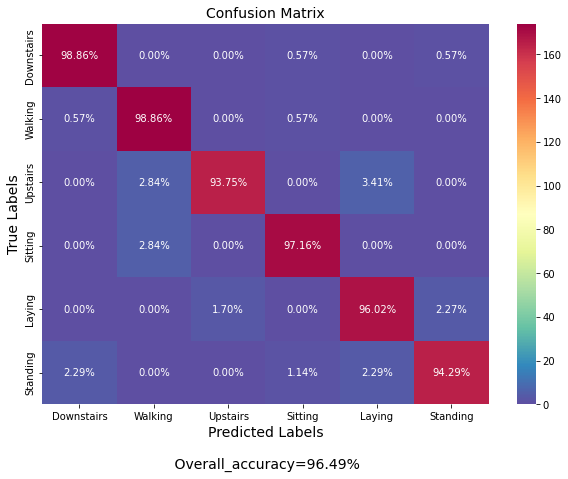

In [19]:
fig = plt.figure(figsize=(10,7))
ax=fig.add_subplot(111)
#sns.heatmap(cm, annot=labels,fmt="",cmap='RdYlBu_r',ax=ax)
sns.heatmap(cm, annot=labels,fmt="",cmap='Spectral_r',ax=ax)
ax.set_xlabel("Predicted Labels\n\n Overall_accuracy=""{0:.2%}".format((acc(y_test,ypred_test))),size=14)
ax.set_ylabel("True Labels",size=14)
ax.set_title("Confusion Matrix",size=14)
ax.xaxis.set_ticklabels(['Downstairs','Walking','Upstairs','Sitting','Laying','Standing'])
ax.yaxis.set_ticklabels(['Downstairs','Walking','Upstairs','Sitting','Laying','Standing'])
plt.savefig('ConfusionMatrix_smart belt',dpi=1200, bbox_inches='tight')

In [20]:
# Predict Probabilities for each class
MODEL_LABELS=['Downstairs','Walking','Upstairs','Sitting','Laying','Standing']
probabilities = rf.predict_proba(X_test)[0]

# save the model to disk
import joblib
 # Save the model as a pickle in a file
#joblib.dump(rf, 'model_rf.pkl')


### Make dict for class-score pair
label_index = probabilities.argmax()
label = MODEL_LABELS[label_index]
ct = datetime.datetime.now()
class_probabilities = dict(zip(MODEL_LABELS, probabilities))

# define chunking function to split a dict into list of dicts
def split_dict_equally(input_dict, chunks=6):
    "Splits dict by keys. Returns a list of dictionaries."
    # prep with empty dicts
    return_list = [dict() for idx in range(chunks)]
    idx = 0
    for k,v in input_dict.items():
        return_list[idx][k] = v
        if idx < chunks-1:  # indexes start at 0
            idx += 1
        else:
            idx = 0
    return return_list

# rename each label(key) in list of dicts with 'gait_score' 
labelprob=split_dict_equally(dict(zip(MODEL_LABELS, probabilities)), chunks=6)
labelprob[0]['gait_score']=labelprob[0].pop('Downstairs')
labelprob[1]['gait_score']=labelprob[1].pop('Walking')
labelprob[2]['gait_score']=labelprob[2].pop('Upstairs')
labelprob[3]['gait_score']=labelprob[3].pop('Sitting')
labelprob[4]['gait_score']=labelprob[4].pop('Laying')
labelprob[5]['gait_score']=labelprob[5].pop('Standing')

#add key-value (gait_class:label) pair to the dict 'labelprob' 
list_new=[]
labels=['Downstairs','Walking','Upstairs','Sitting','Laying','Standing']
for i in range (len(labelprob)):
    updict = {"gait_class" : labels[i]}
    res = {**updict, **labelprob[i]}
    list_new.append(res)
#print(list_new)
#insert current date/timestamp
from datetime import datetime
dateTimeObj = datetime.now()
date=str(dateTimeObj)
observations=[{"timestamp": date, 'Gait Scores':list_new}]
# produce final output
output={"user_id": 12345, "source": "Gait Analysis",'observations':observations}
#print(json_output)
# output in Json format
import json   
output_final = []
output_list = output.copy()
output_final.append(output_list)
json_output = json.dumps(output_final, indent = 4) # Serializing json
print(json_output)

with open('GA_Output_4.json', 'w', encoding='utf-8') as f:
    json.dump(json_output, f, ensure_ascii=False, indent=4)
# Save  model
import joblib
joblib.dump(json_output, 'GA_Output_4_belt.pkl')
#joblib.dump(rf, 'model_rf.pkl')


[
    {
        "user_id": 12345,
        "source": "Gait Analysis",
        "observations": [
            {
                "timestamp": "2022-09-10 18:43:38.908808",
                "Gait Scores": [
                    {
                        "gait_class": "Downstairs",
                        "gait_score": 0.9
                    },
                    {
                        "gait_class": "Walking",
                        "gait_score": 0.0
                    },
                    {
                        "gait_class": "Upstairs",
                        "gait_score": 0.01
                    },
                    {
                        "gait_class": "Sitting",
                        "gait_score": 0.0
                    },
                    {
                        "gait_class": "Laying",
                        "gait_score": 0.09
                    },
                    {
                        "gait_class": "Standing",
                        "gait_score": 0.0


['GA_Output_4_belt.pkl']